<a href="https://colab.research.google.com/github/hyrahmaaa/Submission-Membangun-Sistem-Machine-Learning/blob/main/Eksperimen_Rahayu_Nur_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset diperoleh dari  public repositories yaitu *Kaggle*. Adapun linknya sebagai berikut : https://www.kaggle.com/datasets/blastchar/telco-customer-churn


# **2. Import Library**

Meng-import library bertujuan untuk menggunakan kembali kode yang sudah ditulis, diuji, dan dioptimalkan untuk menambahkan fungsionalitas spesifik ke program tanpa harus menuliskannya dari awal.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# **3. Memuat Dataset**

Memuat dataset berarti membaca data dari sumber eksternal yaitu file CSV dan memasukkannya ke dalam memori program agar siap untuk diproses dan dianalisis.

In [81]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [82]:
file_path = '/content/gdrive/MyDrive/LASKAR AI/SUBMISSION/Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
df.shape

(7043, 21)

In [84]:
# Mendapatkan daftar nama kolom
labels = df.columns.tolist()
labels

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Analisis Variabel :

- customerID. Tipe: Identifikasi unik. Ini adalah identifier dan tidak boleh digunakan sebagai fitur untuk pelatihan model. Oleh karena itu, harus dipastikan dahulu keunikannya setelah itu dihapus dari model.

- gender. Tipe: Kategorikal Biner (Male, Female). Perlu di-encode karena ini kategorikal juga. LabelEncoder atau mapping manual bisa digunakan.

- SeniorCitizen. Tipe: Numerik (0, 1) atau Kategorikal Biner. Ini adalah fitur demografi yang menunjukkan apakah seorang pelanggan adalah warga senior atau bukan.

- Partner. Tipe: Kategorikal Biner (Yes, No). Ini fitur yang menunjukkan apakah seorang pelanggan memiliki pasangan atau tidak. Perlu di-encode.

- Dependents. Kategorikal Biner (Yes, No). Ini menunjukkan apakah seorang pelanggan memiliki tanggungan atau tidak. Perlu di-encode.

- tenure. Tipe: Numerik (jumlah bulan). Ini adalah fitur numerik yang menunjukkan berapa bulan seorang pelanggan telah berlangganan layanan Telco tersebut. Melihat nilainya yang cukup ekstrim perlu dicek distribusi dan outliersnya, selain itu bisa juga dilakukan scale (StandardScaler atau MinMaxScaler).

- PhoneService. Tipe: Kategorikal Biner (Yes, No). Ini fitur kategorikal biner yang menunjukkan apakah seorang pelanggan berlangganan layanan telepon rumah dari perusahaan Telco tersebut atau tidak. Perlu di-encode.

- MultipleLines. Tipe: Kategorikal (Yes, No, No phone service). Fitur ini berkaitan erat dengan kolom PhoneService. Ini menunjukkan apakah pelanggan yang memiliki layanan telepon juga berlangganan lebih dari satu saluran telepon atau tidak.Ini adalah kategorikal dengan 3 kategori. Dapat dilakukan One-Hot Encoding.

- InternetService. Kolom ini menunjukkan jenis layanan internet yang berlangganan oleh pelanggan. Ini adalah fitur kategorikal. Tipe: Kategorikal (DSL, Fiber optic, No). Ini adalah Kategorikal multi-kelas. One-Hot Encoding cocok. Perhatikan No sebagai kategori terpisah.

- OnlineSecurity: Menunjukkan apakah pelanggan berlangganan layanan keamanan online (misalnya, antivirus, firewall). Ini adalah fitur kategorikal. Tipe: Kategorikal (Yes, No, No internet service). Kategori No internet service perlu dianalisis. One-Hot Encoding akan cocok.

- OnlineBackup: Menunjukkan apakah pelanggan berlangganan layanan cadangan data online. Ini adalah fitur kategorikal. Tipe: Kategorikal (Yes, No, No internet service). Kategori No internet service perlu dianalisis. One-Hot Encoding akan cocok.

- DeviceProtection: Menunjukkan apakah pelanggan berlangganan layanan perlindungan perangkat (misalnya, garansi, dukungan untuk perangkat). Ini adalah fitur kategorikal. Tipe: Kategorikal (Yes, No, No internet service). Kategori No internet service perlu dianalisis. One-Hot Encoding akan cocok.

- TechSupport: Menunjukkan apakah pelanggan berlangganan layanan dukungan teknis. Ini adalah fitur kategorikal. Tipe: Kategorikal (Yes, No, No internet service). Kategori No internet service perlu dianalisis. One-Hot Encoding akan cocok.

- StreamingTV: Menunjukkan apakah pelanggan berlangganan layanan streaming TV. Ini adalah fitur kategorikal. Tipe: Kategorikal (Yes, No, No internet service). Kategori No internet service perlu dianalisis. One-Hot Encoding akan cocok.

- StreamingMovies: Menunjukkan apakah pelanggan berlangganan layanan streaming film. Ini adalah fitur kategorikal. Tipe: Kategorikal (Yes, No, No internet service). Kategori No internet service perlu dianalisis. One-Hot Encoding akan cocok.

- Contract: Kolom ini menunjukkan jenis kontrak yang dimiliki pelanggan dengan perusahaan Telco. Ini adalah fitur kategorikal. Tipe: Kategorikal (Month-to-month, One year, Two year). Kategorikal multi-kelas. One-Hot Encoding cocok.

- PaperlessBilling: Menunjukkan apakah pelanggan memilih untuk menerima tagihan tanpa kertas (melalui email/online) atau tagihan fisik. Ini adalah fitur kategorikal biner. Tipe: Kategorikal Biner (Yes, No). Perlu di-encode.

- PaymentMethod: Menunjukkan metode pembayaran yang digunakan pelanggan. Ini adalah fitur kategorikal multi-kelas. Tipe: Kategorikal Multi-kelas (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)). One-Hot Encoding cocok.

- MonthlyCharges:  Kolom numerik yang menunjukkan total biaya bulanan yang dikenakan kepada pelanggan. Tipe: Numerik (biaya bulanan). Cek distribusi, outliers. Perlu di-scale.

- TotalCharges: Kolom numerik yang menunjukkan total biaya yang telah dibebankan kepada pelanggan sepanjang masa berlangganan mereka (sejak tenure dimulai). Tipe: KRUSIAL! Ini adalah variabel yang paling sering menimbulkan masalah.Saat diimpor, kolom ini seringkali dibaca sebagai object (string) karena adanya beberapa nilai kosong yang diwakili oleh spasi (' ') atau karakter non-numerik lainnya, bukan NaN. Oleh karena itu, harus mengkonversi kolom ini ke tipe numerik (float). Gunakan pd.to_numeric(df['TotalCharges'], errors='coerce') untuk mengubah nilai non-numerik menjadi NaN.
Setelah itu,  perlu menangani NaN yang muncul (misalnya, mengisi dengan median/mean, atau menghapus baris). Karena dataset ini relatif kecil, mengisi dengan median/mean biasanya lebih aman daripada menghapus baris.
Setelah numerik, perlu di-scale bersama fitur numerik lainnya.

- Churn: Tipe: Target Kategorikal Biner (Yes, No). Ini adalah variabel target. Perlu di-encode menjadi numerik (0 dan 1) agar bisa digunakan oleh model. LabelEncoder sangat cocok di sini.

# **4. Exploratory Data Analysis (EDA)**

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [85]:
# Cek informasi umum termasuk jenis variabel dataset
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


- TotalCharges (dari object menjadi float64).

- Encoding Biner: Lakukan Label Encoding untuk kolom-kolom biner yang masih object (gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn).

- Encoding Multi-Kategorikal: Lakukan One-Hot Encoding untuk kolom-kolom multi-kategorikal yang masih object (MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod).

In [86]:
# Statistik deskriptif sebelum preprocessing
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Perlu dilakukan statistik deskriptif setelah preprocessing.

In [87]:
# Cek missing value dengan fungsi isnull()
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Tidak ada missing value

In [88]:
# Cek duplikasi
df['customerID'].duplicated()

,customerID
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [89]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


Tidak ada duplikasi, maka kolom customerID boleh dihapus

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan:

1. Menghapus atau Menangani Data Kosong (Missing Values)

Karena tidak ada missing value, maka next.

2. Menghapus Data Duplikat.

Karena tidak ada data duplikat, maka next.

3. Hapus kolom yang tidak digunakan dalam model.

Karena kolom 'customerID' adalah unique code dan tidak ada duplikasi, maka bisa dilakukan penghapusan.

In [90]:
df.drop('customerID', axis=1, inplace=True)
labels = df.columns.tolist()
labels

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

5. Ubah Tipe Data yang benar

In [91]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [92]:
nan_count = df['TotalCharges'].isnull().sum()
print(f"Jumlah NaN di kolom 'TotalCharges' setelah konversi: {nan_count}")

Jumlah NaN di kolom 'TotalCharges' setelah konversi: 11


In [93]:
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)
print(f"NaN di 'TotalCharges' diisi dengan median: {median_total_charges}")

NaN di 'TotalCharges' diisi dengan median: 1397.475


In [94]:
print("\nTipe data kolom 'TotalCharges' setelah preprocessing:")
print(df['TotalCharges'].dtype)


Tipe data kolom 'TotalCharges' setelah preprocessing:
float64


6. Statistik deskriptif setelah Preprocessing

In [95]:
# Statistik deskriptif setelah preprocessing
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Terdapat potensi skewness dan multikoliniearitas sehingga harus coba diliat histogram dan korelasinya antar fitur.

7. Analisis Variabel

Numerical Variabel:

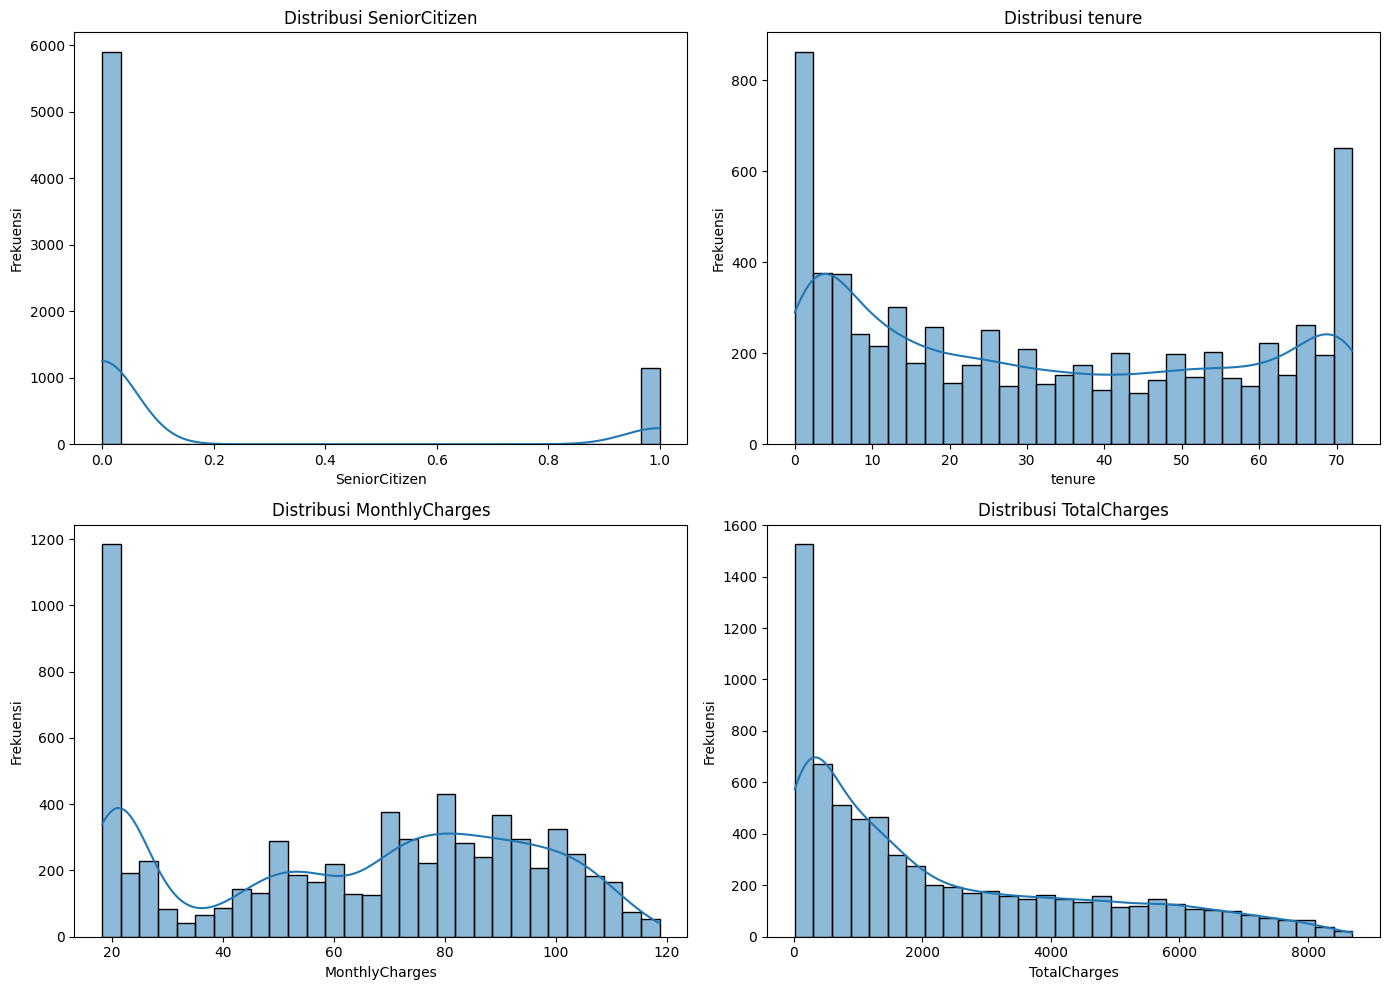

In [96]:
numerical_cols = df.select_dtypes(include=np.number).columns

n_rows = 2
n_cols = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 10))

# Flatten the axes array for easier iteration
axes_flat = axes.flatten()

for i, col in enumerate(numerical_cols):
    # Use the flattened axes array to access individual axes
    sns.histplot(df[col], kde=True, ax=axes_flat[i], bins=30)
    axes_flat[i].set_title(f'Distribusi {col}')
    axes_flat[i].set_xlabel(col)
    axes_flat[i].set_ylabel('Frekuensi')

# Hide any unused axes
for j in range(len(numerical_cols), n_rows * n_cols):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

Dari Histogram:

- SeniorCitizen: Mayoritas pelanggan bukan senior.

- tenure: Distribusi menunjukkan banyak pelanggan baru dan juga banyak pelanggan yang sangat loyal (sudah lama).

- MonthlyCharges: Ada dua kelompok besar pelanggan: yang membayar biaya bulanan rendah dan yang membayar tinggi, mungkin karena perbedaan paket layanan.

- TotalCharges: Distribusi sangat miring ke kanan, artinya banyak pelanggan dengan total biaya rendah dan lebih sedikit dengan total biaya sangat tinggi.



--- Matriks Korelasi ---
                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102652
tenure               0.016567  1.000000        0.247900      0.825464
MonthlyCharges       0.220173  0.247900        1.000000      0.650864
TotalCharges         0.102652  0.825464        0.650864      1.000000


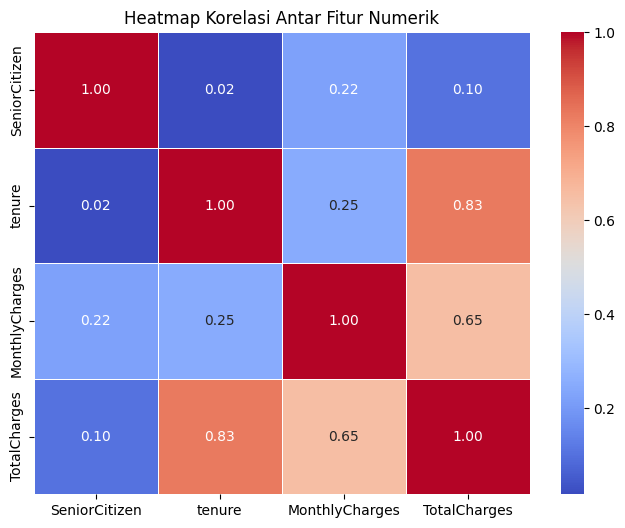

In [97]:
correlation_matrix = df[numerical_cols].corr()

print("\n--- Matriks Korelasi ---")
print(correlation_matrix)

# Visualisasikan matriks korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()


Dari Heatmap Korelasi:

- Multikolinearitas Kuat: Ada korelasi sangat kuat antara tenure dan TotalCharges (0.83). Ini wajar karena TotalCharges secara logis akan meningkat seiring dengan lamanya berlangganan (tenure).

- Korelasi Moderat: MonthlyCharges juga memiliki korelasi cukup kuat dengan TotalCharges (0.65).

- Implikasi: Korelasi tinggi antara tenure dan TotalCharges menunjukkan potensi multikolinearitas. Untuk beberapa model ML (misalnya regresi linier), ini bisa menjadi masalah dan mungkin perlu ditangani (misalnya, memilih salah satu fitur atau menggunakan VIF untuk validasi). Namun, untuk model lain seperti tree-based models, multikolinearitas tidak selalu menjadi masalah besar.

Kategori Variabel:

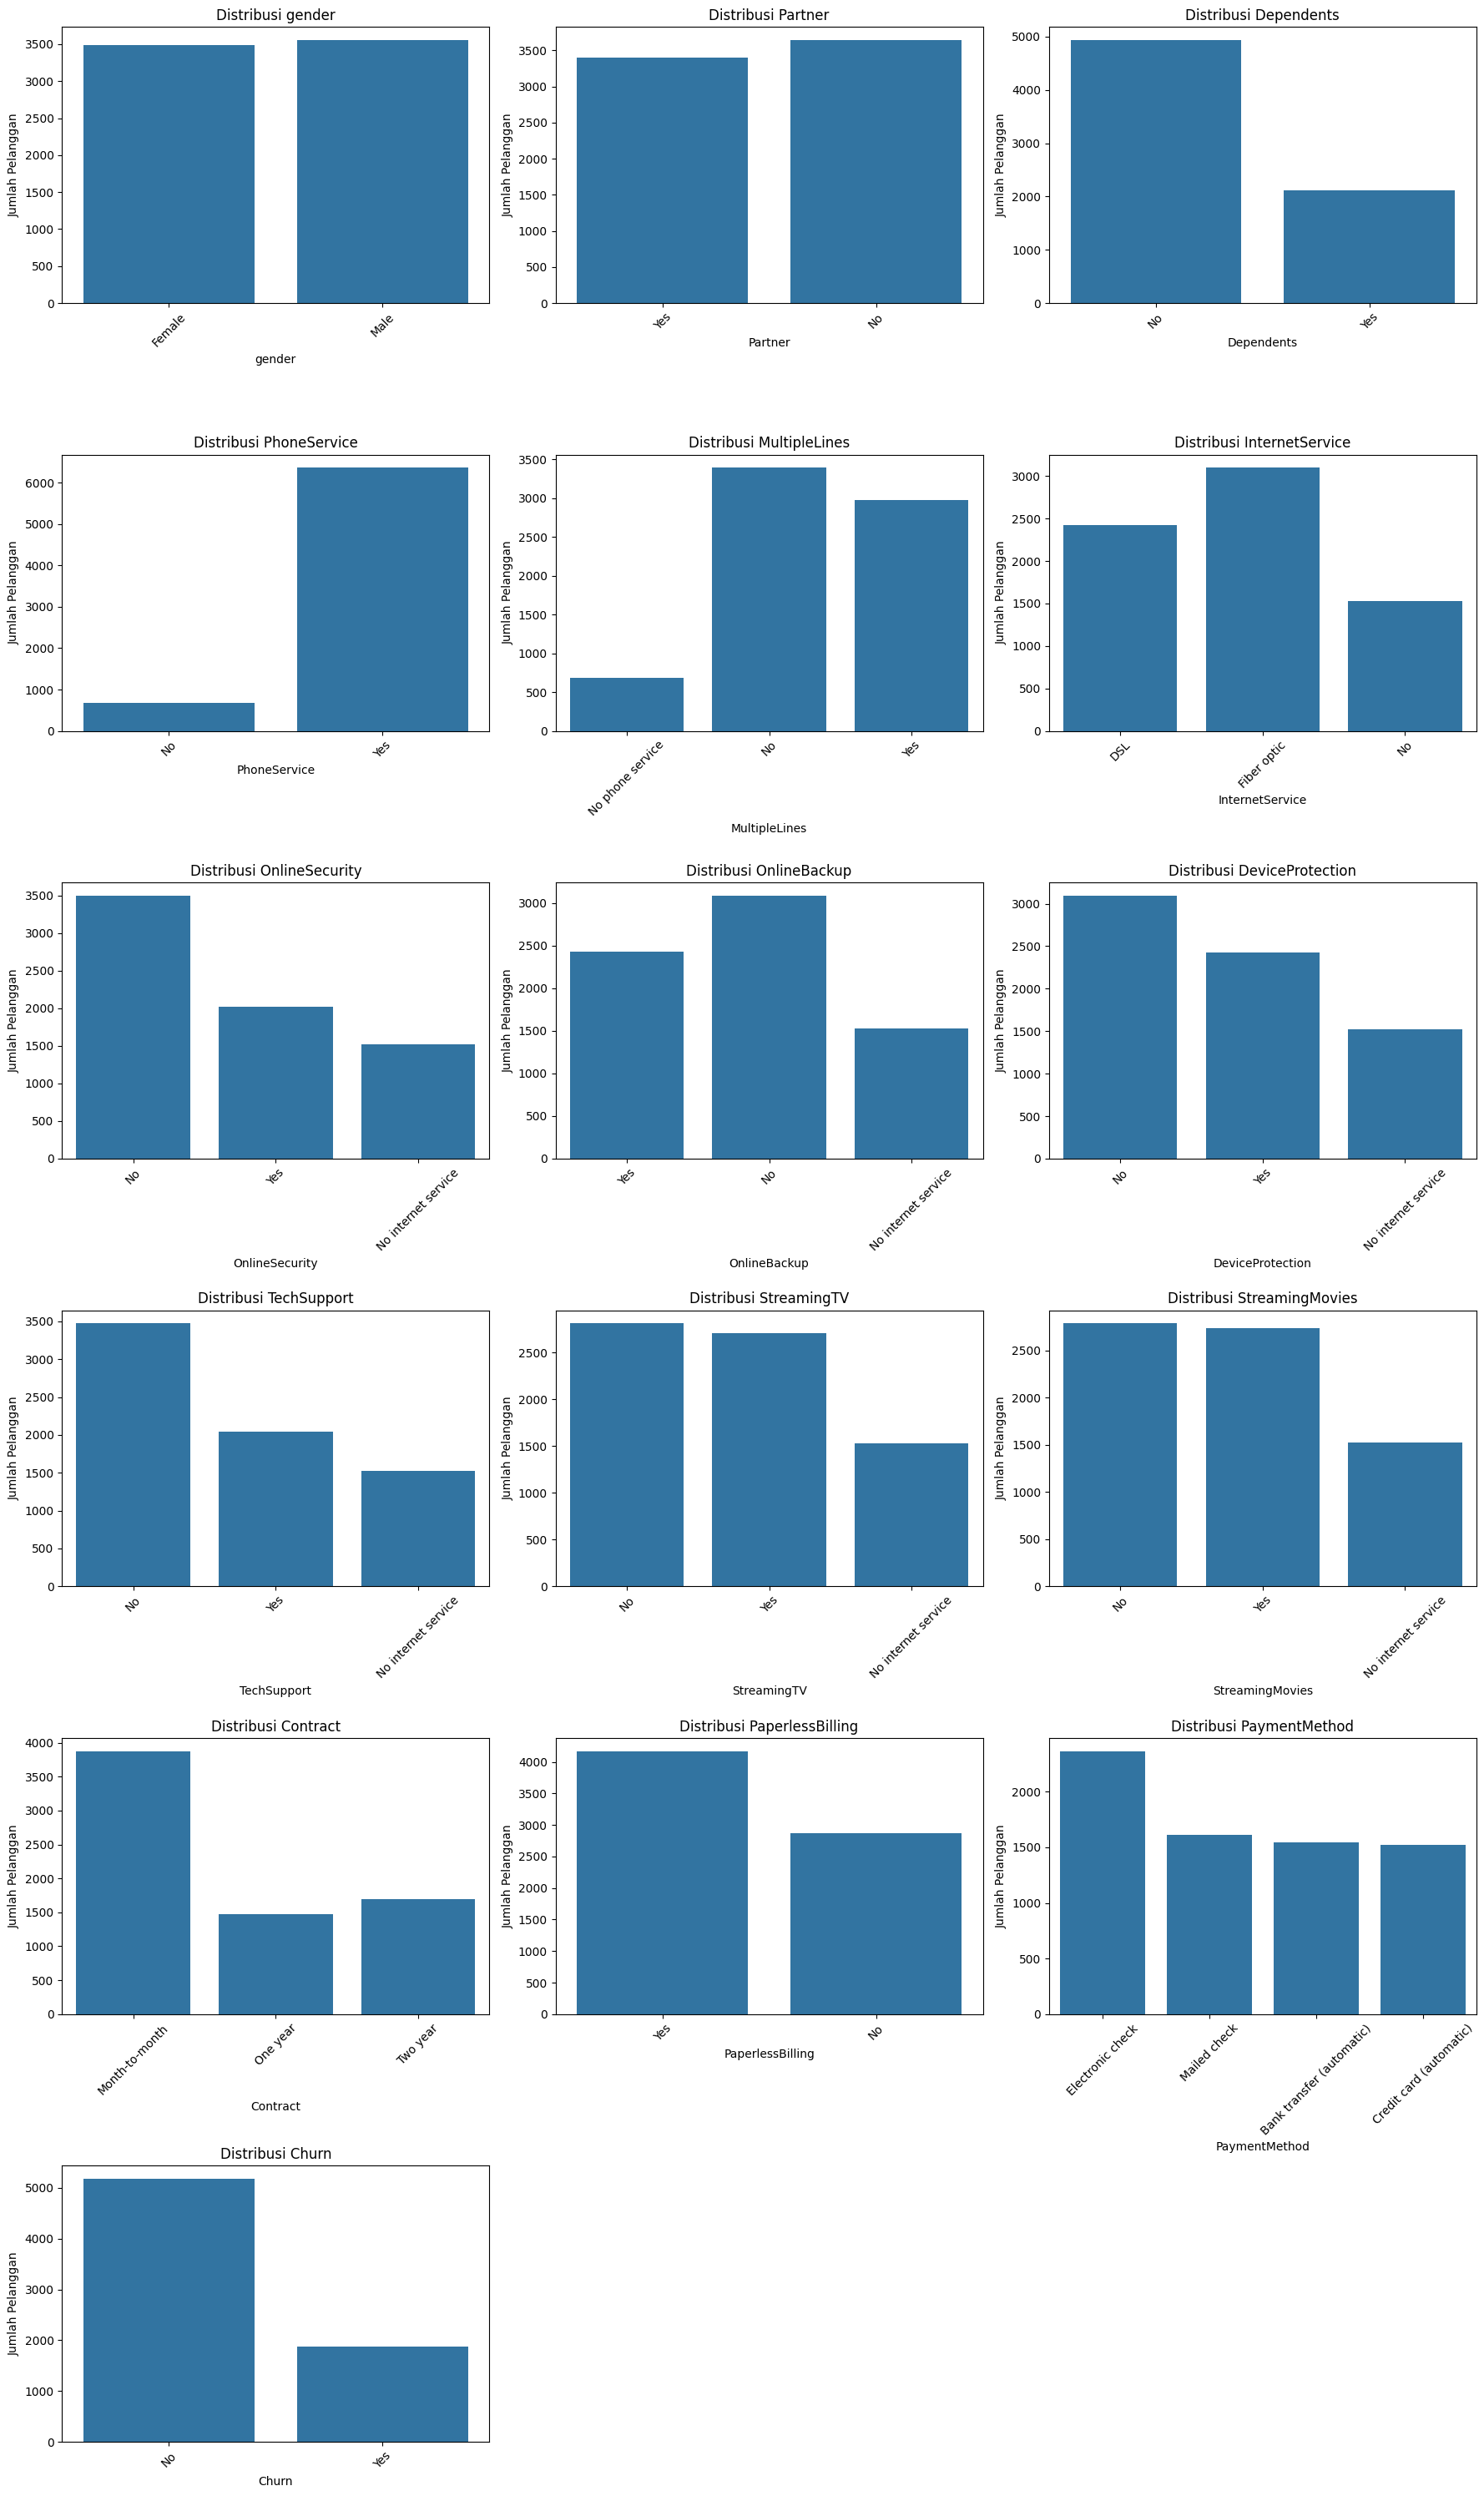

In [98]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah Pelanggan')
    axes[i].tick_params(axis='x', rotation=45)
for j in range(len(categorical_cols), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

8. Deteksi dan Penanganan Outlier

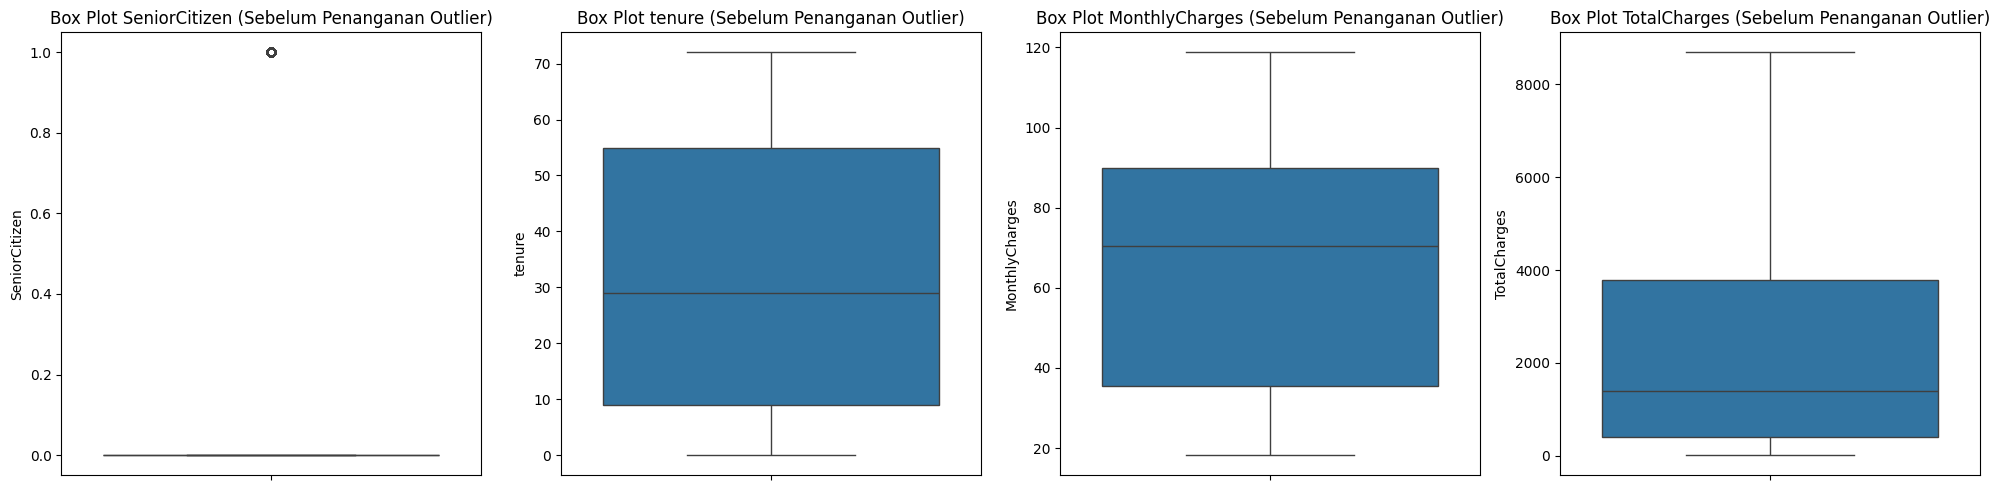

In [99]:
# Visualisasi Box Plot SEBELUM Penanganan Outlier
plt.figure(figsize=(20, 5)) # Adjust figure size for wider plots
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 4, i + 1) # Change to 1 row, 4 columns
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot {col} (Sebelum Penanganan Outlier)')
plt.tight_layout()
plt.show()

Outlier di kolom 'SeniorCitizen' ditangani dengan capping (Batas Bawah: 0.00, Batas Atas: 0.00)
Outlier di kolom 'tenure' ditangani dengan capping (Batas Bawah: -60.00, Batas Atas: 124.00)
Outlier di kolom 'MonthlyCharges' ditangani dengan capping (Batas Bawah: -46.02, Batas Atas: 171.38)
Outlier di kolom 'TotalCharges' ditangani dengan capping (Batas Bawah: -4674.34, Batas Atas: 8863.16)


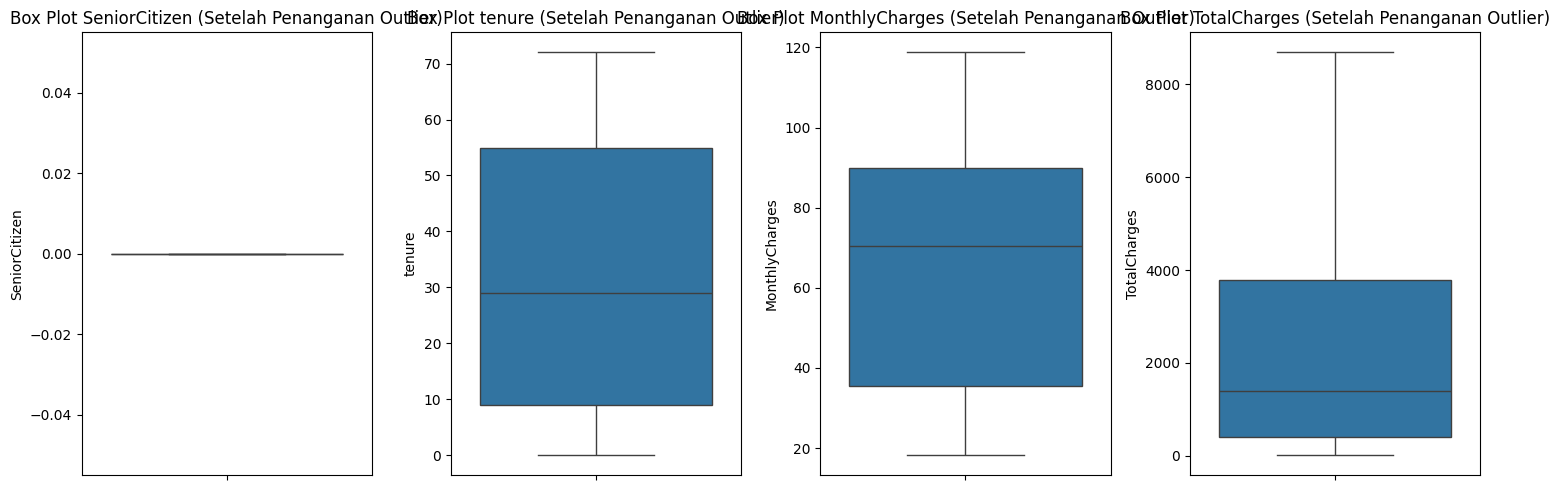

In [100]:
# Fungsi untuk mendeteksi dan menangani outlier (capping/winsorization)
def handle_outliers_iqr_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    print(f"Outlier di kolom '{column}' ditangani dengan capping (Batas Bawah: {lower_bound:.2f}, Batas Atas: {upper_bound:.2f})")
    return df

# Terapkan penanganan outlier ke kolom yang relevan
df_cleaned = df.copy()
for col in numerical_cols:
    df_cleaned = handle_outliers_iqr_capping(df_cleaned, col)

# Visualisasi Box Plot SETELAH Penanganan Outlier
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    # Change the number of columns in subplot to 4 to match the number of numerical columns
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot {col} (Setelah Penanganan Outlier)')
plt.tight_layout()
plt.show()

Penanganan outlier dengan metode IQR Capping efektif membersihkan data dari nilai-nilai ekstrem, terutama pada kolom MonthlyCharges dan TotalCharges. Meskipun tenure tidak banyak terpengaruh karena memang memiliki sedikit outlier, proses ini memastikan bahwa fitur numerik yang akan digunakan untuk pelatihan model memiliki distribusi yang lebih terkontrol, sehingga dapat meningkatkan kinerja dan stabilitas beberapa algoritma Machine Learning yang sensitif terhadap outlier atau rentang data.

9. Encoding Data Kategorikal

Akan dilakukan encoding berdasarkan tipe data:
- Label Encoding: Untuk gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn. (Karena biner atau target).
- One-Hot Encoding: Untuk MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod. (Karena nominal dan multi-kelas).

In [101]:
binary_categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]

print("\n--- Penerapan Label Encoding ---")

# Buat salinan DataFrame untuk menyimpan hasil encoding
df_encoded = df.copy()

le = LabelEncoder()

for col in binary_categorical_cols:
    print(f"\nKolom: {col}")
    print(f"Nilai unik sebelum encoding: {df_encoded[col].unique()}")

    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])
        print(f"Nilai unik setelah encoding: {df_encoded[col].unique()}")
    else:
        print(f"Kolom '{col}' sudah dalam format numerik (dtype: {df_encoded[col].dtype}), tidak perlu Label Encoding.")


print("\nDataFrame setelah Label Encoding (beberapa kolom biner):")
print(df_encoded[binary_categorical_cols].head())

print("\nDtypes setelah Label Encoding:")
print(df_encoded[binary_categorical_cols].dtypes)


--- Penerapan Label Encoding ---

Kolom: gender
Nilai unik sebelum encoding: ['Female' 'Male']
Nilai unik setelah encoding: [0 1]

Kolom: Partner
Nilai unik sebelum encoding: ['Yes' 'No']
Nilai unik setelah encoding: [1 0]

Kolom: Dependents
Nilai unik sebelum encoding: ['No' 'Yes']
Nilai unik setelah encoding: [0 1]

Kolom: PhoneService
Nilai unik sebelum encoding: ['No' 'Yes']
Nilai unik setelah encoding: [0 1]

Kolom: PaperlessBilling
Nilai unik sebelum encoding: ['Yes' 'No']
Nilai unik setelah encoding: [1 0]

Kolom: Churn
Nilai unik sebelum encoding: ['No' 'Yes']
Nilai unik setelah encoding: [0 1]

DataFrame setelah Label Encoding (beberapa kolom biner):
   gender  Partner  Dependents  PhoneService  PaperlessBilling  Churn
0       0        1           0             0                 1      0
1       1        0           0             1                 0      0
2       1        0           0             1                 1      1
3       1        0           0             0       

In [102]:
one_hot_encode_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

one_hot_encode_cols_existing = [col for col in one_hot_encode_cols if col in df_encoded.columns and df_encoded[col].dtype == 'object']

print(f"\nKolom yang akan di-One-Hot Encode: {one_hot_encode_cols_existing}")
print(f"Bentuk DataFrame sebelum One-Hot Encoding: {df_encoded.shape}")

df_final_encoded = pd.get_dummies(df_encoded, columns=one_hot_encode_cols_existing, drop_first=True)

print(f"Bentuk DataFrame setelah One-Hot Encoding: {df_final_encoded.shape}")

print("\nDataFrame setelah One-Hot Encoding (beberapa baris):")
print(df_final_encoded.head())

print("\nDtypes setelah One-Hot Encoding (beberapa kolom baru):")
print(df_final_encoded.dtypes.tail(15))


Kolom yang akan di-One-Hot Encode: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Bentuk DataFrame sebelum One-Hot Encoding: (7043, 20)
Bentuk DataFrame setelah One-Hot Encoding: (7043, 31)

DataFrame setelah One-Hot Encoding (beberapa baris):
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2          

10. Split Data

In [103]:
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Hasil Split Data ---")
print(f"Ukuran X_train (Fitur untuk Training): {X_train.shape}")
print(f"Ukuran X_test (Fitur untuk Testing): {X_test.shape}")
print(f"Ukuran y_train (Target untuk Training): {y_train.shape}")
print(f"Ukuran y_test (Target untuk Testing): {y_test.shape}")

# Opsional: Periksa distribusi kelas di training dan test set
print("\nDistribusi kelas 'Churn' di y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi kelas 'Churn' di y_test:")
print(y_test.value_counts(normalize=True))


--- Hasil Split Data ---
Ukuran X_train (Fitur untuk Training): (5634, 19)
Ukuran X_test (Fitur untuk Testing): (1409, 19)
Ukuran y_train (Target untuk Training): (5634,)
Ukuran y_test (Target untuk Testing): (1409,)

Distribusi kelas 'Churn' di y_train:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Distribusi kelas 'Churn' di y_test:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


11. Normalisasi atau Standarisasi Fitur

In [104]:
numerical_cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
scaler.fit(X_train[numerical_cols_to_scale])

X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols_to_scale] = scaler.transform(X_train[numerical_cols_to_scale])
X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])


print("\n--- Contoh Data Setelah Penskalaan (X_train_scaled) ---")
print(X_train_scaled[numerical_cols_to_scale].head())
print("\n--- Contoh Data Setelah Penskalaan (X_test_scaled) ---")
print(X_test_scaled[numerical_cols_to_scale].head())


--- Contoh Data Setelah Penskalaan (X_train_scaled) ---
        tenure  MonthlyCharges  TotalCharges
3738  0.102371       -0.521976     -0.263289
3151 -0.711743        0.337478     -0.504814
4860 -0.793155       -0.809013     -0.751213
3867 -0.263980        0.284384     -0.173699
3810 -1.281624       -0.676279     -0.990851

--- Contoh Data Setelah Penskalaan (X_test_scaled) ---
        tenure  MonthlyCharges  TotalCharges
437   1.608483        1.629976      2.707614
2280 -0.996684        1.168725     -0.611505
2235  0.346606        0.445324      0.399490
4460 -0.589626        0.440347     -0.365546
3761  1.608483        0.588013      1.588523
